# Sparse Hebbian Learning with Histogram Equalization Homeostasis : testing with different learning rates

In this notebook, we test the convergence of SparseNet as a function of different learning parameters. This shows the relative robusteness of this method according to the coding parameters, but also the importance of homeostasis to obtain an efficient set of filters.

It uses the full homeostasis layer (by setting ``alpha_homeo=0.``) - to be compared to a smoother Olshausen-like homeostasis.

See also :
* http://blog.invibe.net/posts/2015-05-05-reproducing-olshausens-classical-sparsenet.html for a description of how SparseNet is implemented in the scikit-learn package
* http://blog.invibe.net/posts/2015-05-06-reproducing-olshausens-classical-sparsenet-part-2.html for a descrtiption of how we managed to implement the homeostasis

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

In [3]:
from shl_scripts.shl_experiments import SHL_set
tag = 'HEH'
experiments = SHL_set({})

In [4]:
%%writefile {experiments.shl.cache_dir}/{tag}.py

import numpy as np
np.set_printoptions(precision=2, suppress=True)

import sys
try:
    command = sys.argv[1]
except:
    command = 'run'
try:
    n_jobs = sys.argv[2]
except:
    n_jobs = 1
    n_jobs = 32
    
from shl_scripts.shl_experiments import SHL_set
tag = 'HEH'
opts = dict(homeo_method=tag, verbose=0)

experiments = SHL_set(opts, tag=tag)

variables = ['eta', 'alpha_homeo']
variables = ['eta', 'alpha_homeo', 'eta_homeo']
variables = ['eta', 'eta_homeo', 'l0_sparseness']
variables = ['eta', 'eta_homeo', 'eta_precision', 'alpha_MP']

list_figures = []
list_figures = ['show_dico']

display_variables = ['error', 'logL', 'cputime']
display_variables = ['error', 'logL', 'qerror', 'aerror', 'MI', 'cputime']
display_variables = ['error', 'logL', 'perror', 'MC', 'cputime']
display_variables = ['F']

if command == 'run':
    experiments.run(variables=variables, n_jobs=n_jobs)

if command == 'plot':
    import matplotlib.pyplot as plt

    #fig, ax = experiments.scan(variable='eta', list_figures=[], display='dynamic')
    #fig, ax = experiments.scan(variable='eta', list_figures=[], display='final')
    for variable in variables:
        experiments = SHL_set(opts, tag=tag, do_run=False)
        experiments.scan(variable=variable, list_figures=list_figures, display='', fig_kwargs={'dim_graph':(2, 15)}, verbose=1)
        plt.show()

        for display_variable in display_variables:
            print('Time evolution of ', display_variable)
            fig, ax = experiments.scan(variable=variable, list_figures=[], display='dynamic', display_variable=display_variable)
            plt.show()
        plt.show()

        for display_variable in display_variables:
            print('Comparison at the end of learning for ', display_variable)
            fig, ax = experiments.scan(variable=variable, list_figures=[], display='final', 
                                       label=tag, display_variable=display_variable)
            plt.show()
        

Overwriting cache_dir/HEH.py


In [5]:
%run {experiments.shl.cache_dir}/{tag}.py load

In [6]:
!ls -l {experiments.shl.cache_dir}/{tag}*
!rm -fr {experiments.shl.cache_dir}/{tag}*lock*

-rw-r--r--  1 laurentperrinet  staff     1973 Sep 25 17:11 cache_dir/HEH.py
-rw-r--r--  1 laurentperrinet  staff  2194285 Sep 25 14:32 cache_dir/HEH_alpha_MP=0.19489_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2194285 Sep 25 14:32 cache_dir/HEH_alpha_MP=0.28569_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2194285 Sep 25 14:32 cache_dir/HEH_alpha_MP=0.41881_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2194285 Sep 25 14:32 cache_dir/HEH_alpha_MP=0.61394_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2194285 Sep 25 14:32 cache_dir/HEH_alpha_MP=0.90000_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2194285 Sep 25 14:32 cache_dir/HEH_alpha_MP=1.31934_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2194285 Sep 25 14:32 cache_dir/HEH_alpha_MP=1.93406_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2194285 Sep 25 14:32 cache_dir/HEH_alpha_MP=2.83521_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2194285 Sep 25 14:32 cache_dir/HEH_alpha_MP=4.15623_dico.pkl
-rw-r--r--  1 laurentperrinet  st

In [7]:
%run {experiments.shl.cache_dir}/{tag}.py run

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   1 tasks      | elapsed: 48.9min
[Parallel(n_jobs=32)]: Done   3 out of  36 | elapsed: 49.0min remaining: 539.3min
[Parallel(n_jobs=32)]: Done   6 out of  36 | elapsed: 49.1min remaining: 245.5min
[Parallel(n_jobs=32)]: Done   9 out of  36 | elapsed: 49.2min remaining: 147.5min
[Parallel(n_jobs=32)]: Done  12 out of  36 | elapsed: 49.2min remaining: 98.4min
[Parallel(n_jobs=32)]: Done  15 out of  36 | elapsed: 49.3min remaining: 69.0min
[Parallel(n_jobs=32)]: Done  18 out of  36 | elapsed: 49.3min remaining: 49.3min
[Parallel(n_jobs=32)]: Done  21 out of  36 | elapsed: 49.4min remaining: 35.3min
[Parallel(n_jobs=32)]: Done  24 out of  36 | elapsed: 49.4min remaining: 24.7min
[Parallel(n_jobs=32)]: Done  27 out of  36 | elapsed: 49.5min remaining: 16.5min
[Parallel(n_jobs=32)]: Done  30 out of  36 | elapsed: 49.5min remaining:  9.9min
[Parallel(n_jobs=32)]: Done  33 out of  36 | ela

Running variable eta with value 0.0001


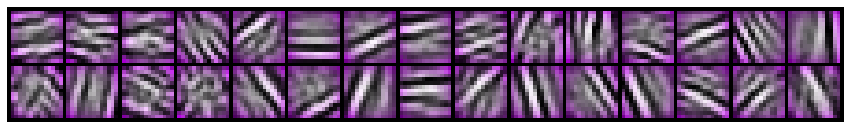

Running variable eta with value 0.0002


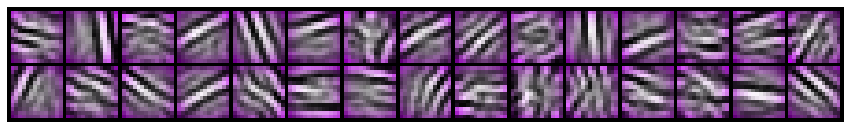

Running variable eta with value 0.0002


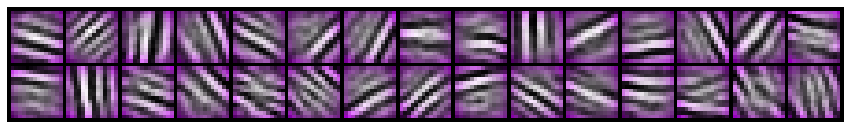

Running variable eta with value 0.0003


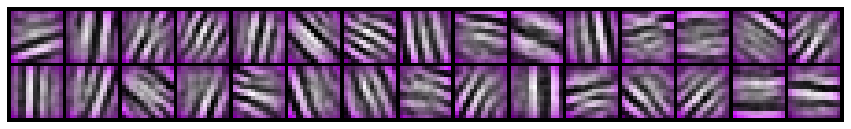

Running variable eta with value 0.0005


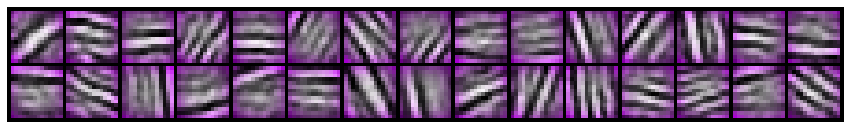

Running variable eta with value 0.0007


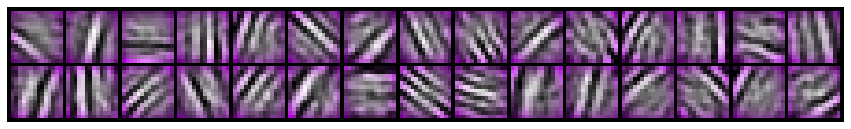

Running variable eta with value 0.0011


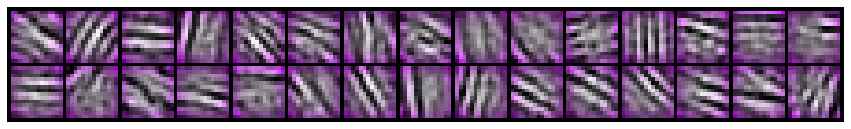

Running variable eta with value 0.0016


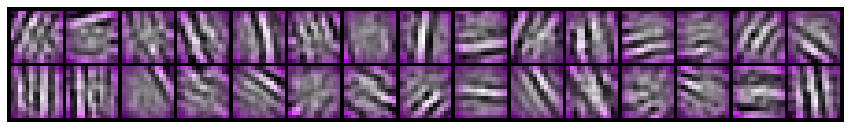

Running variable eta with value 0.0023


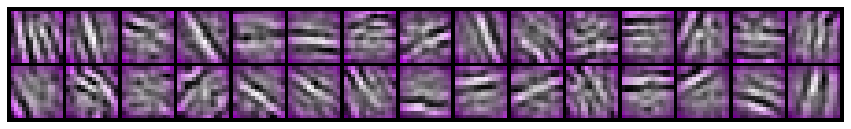

Time evolution of  F


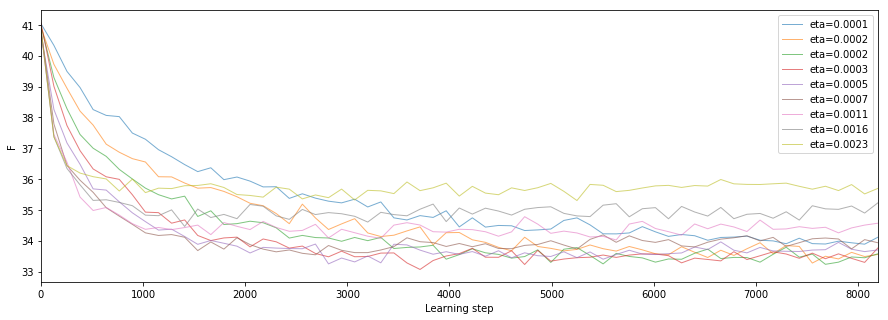

Comparison at the end of learning for  F


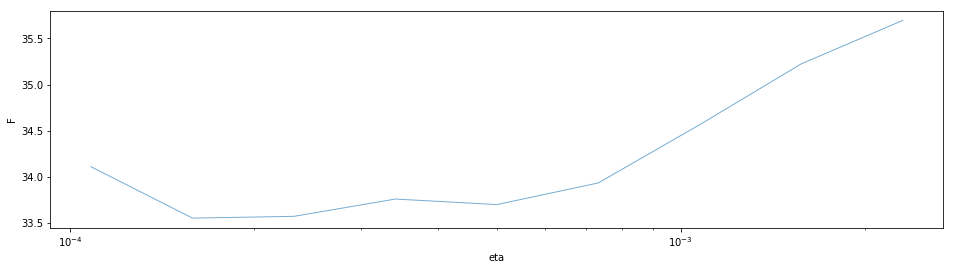

Running variable eta_homeo with value 0.0000


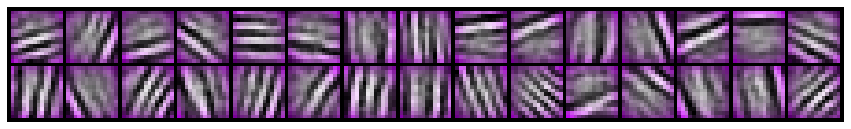

Running variable eta_homeo with value 0.0000


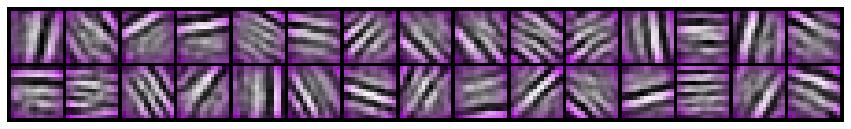

Running variable eta_homeo with value 0.0000


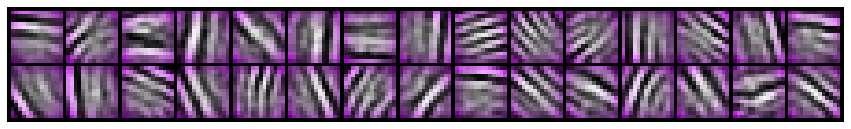

Running variable eta_homeo with value 0.0001


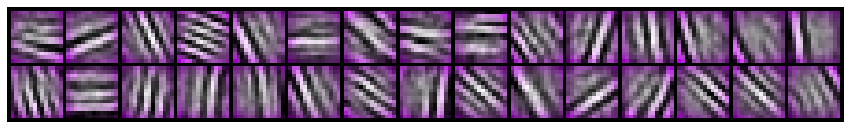

Running variable eta_homeo with value 0.0001


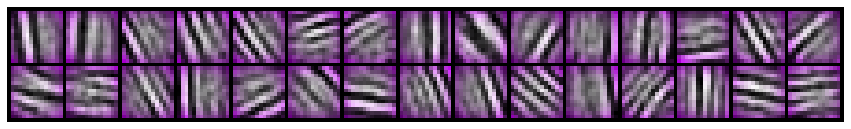

Running variable eta_homeo with value 0.0001


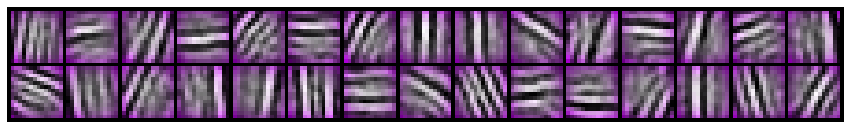

Running variable eta_homeo with value 0.0002


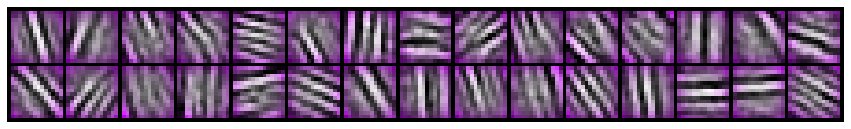

Running variable eta_homeo with value 0.0003


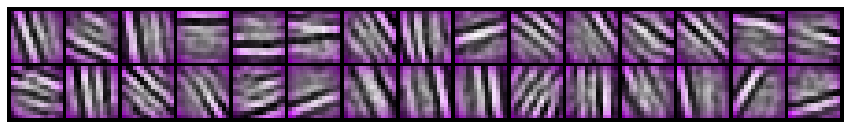

Running variable eta_homeo with value 0.0005


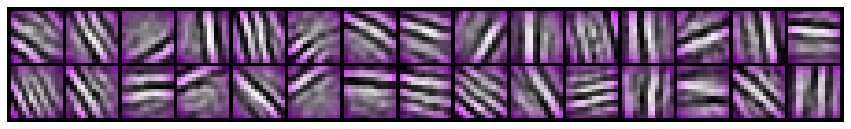

Time evolution of  F


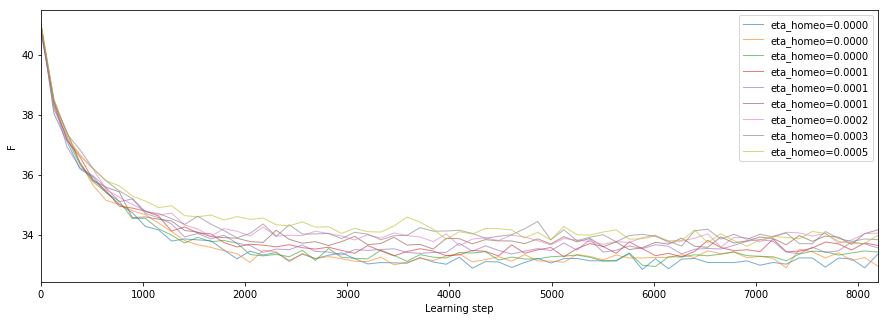

Comparison at the end of learning for  F


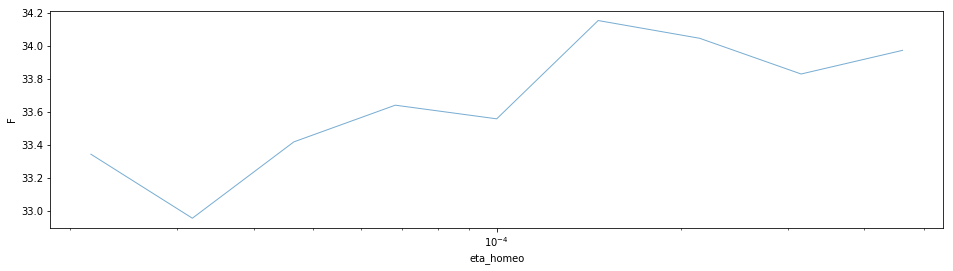

Running variable eta_precision with value 0.0001


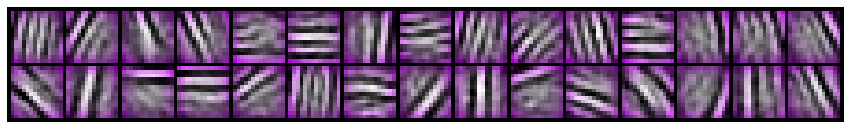

Running variable eta_precision with value 0.0002


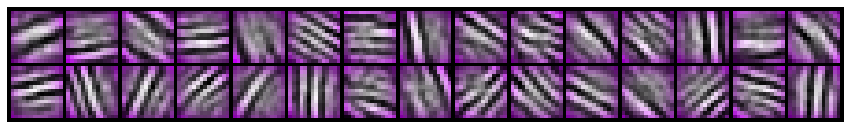

Running variable eta_precision with value 0.0002


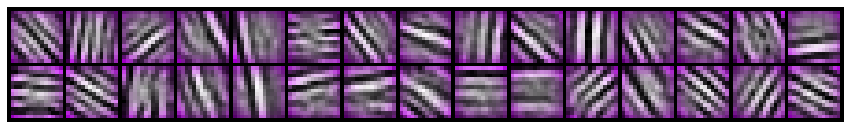

Running variable eta_precision with value 0.0003


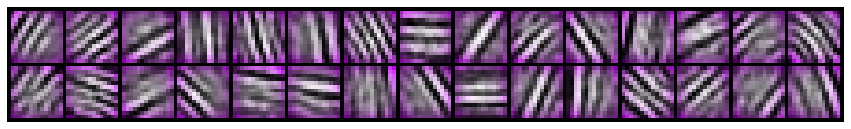

Running variable eta_precision with value 0.0005


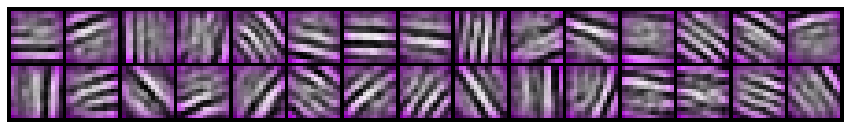

Running variable eta_precision with value 0.0007


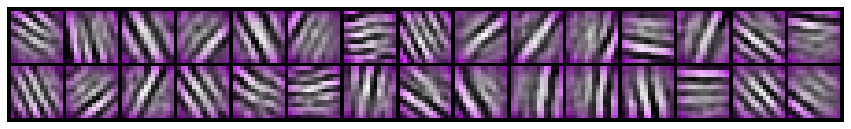

Running variable eta_precision with value 0.0011


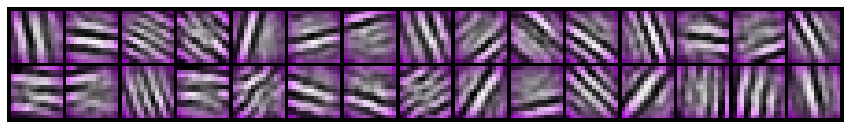

Running variable eta_precision with value 0.0016


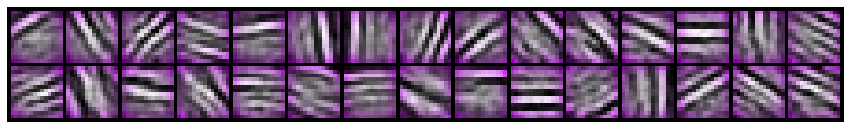

Running variable eta_precision with value 0.0023


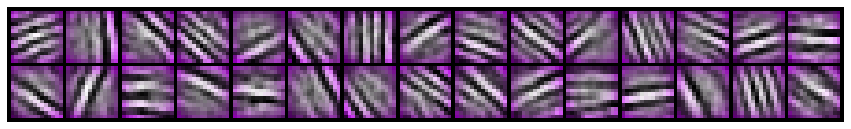

Time evolution of  F


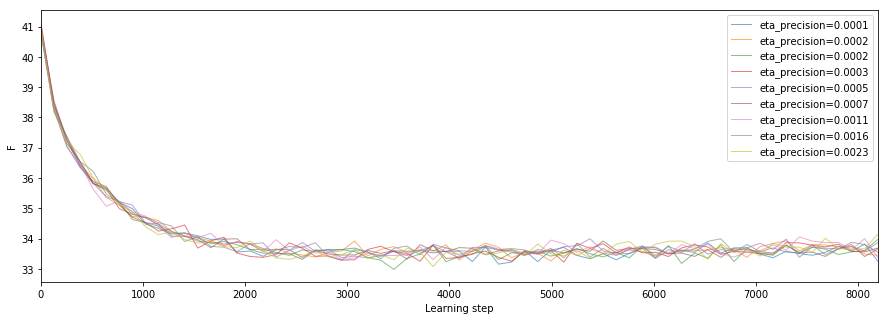

Comparison at the end of learning for  F


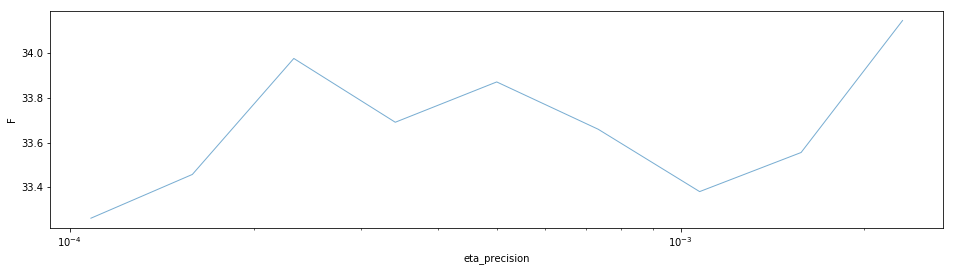

Running variable alpha_MP with value 0.2165


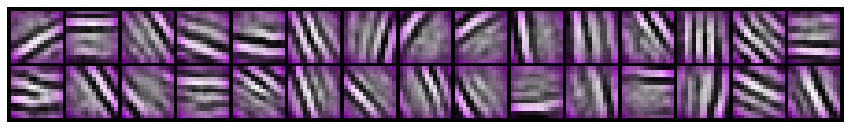

Running variable alpha_MP with value 0.2622


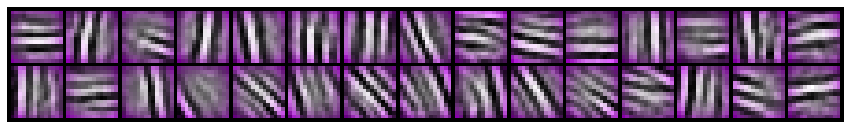

Running variable alpha_MP with value 0.3174


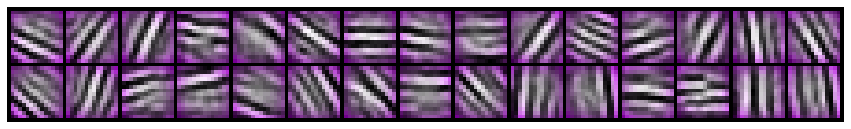

Running variable alpha_MP with value 0.3843


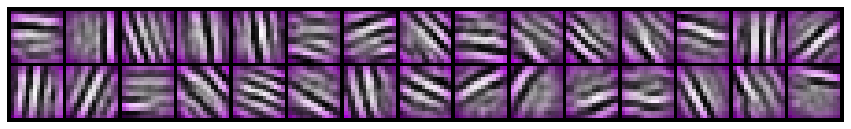

Running variable alpha_MP with value 0.4653


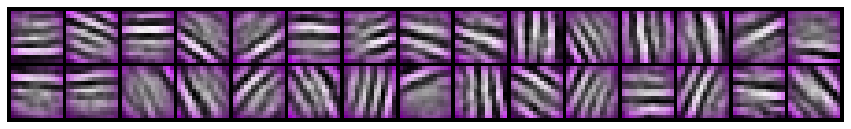

Running variable alpha_MP with value 0.5634


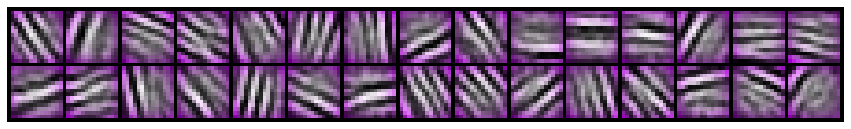

Running variable alpha_MP with value 0.6822


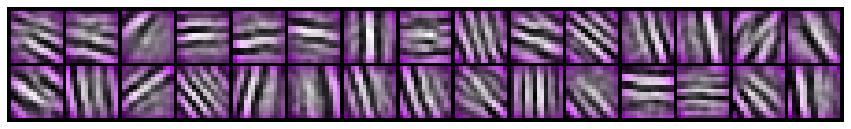

Running variable alpha_MP with value 0.8259


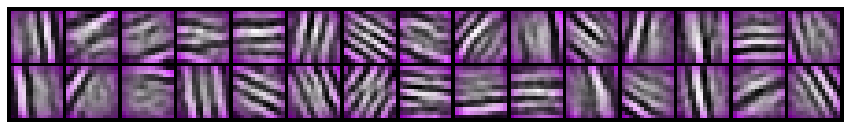

Running variable alpha_MP with value 1.0000


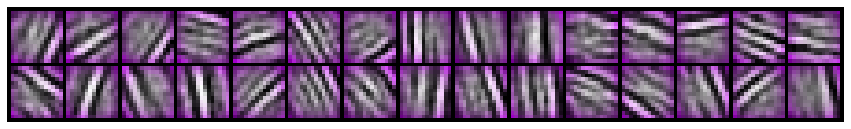

Time evolution of  F


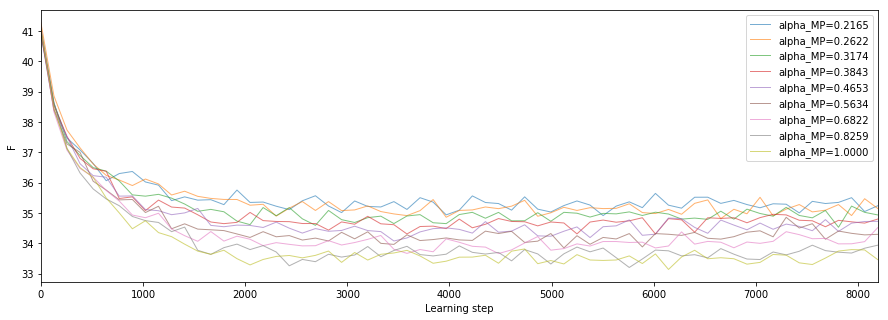

Comparison at the end of learning for  F


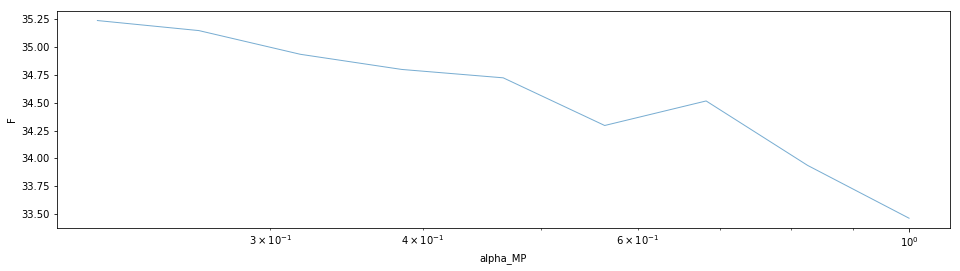

In [8]:
%run {experiments.shl.cache_dir}/{tag}.py plot

In [9]:
%load_ext version_information
%version_information shl_scripts, numpy, shl_scripts, pandas, matplotlib

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)]
IPython 6.5.0
OS Darwin 18.0.0 x86_64 i386 64bit
shl_scripts 20171221
numpy 1.15.2
shl_scripts 20171221
pandas 0.23.4
matplotlib 3.0.0
Tue Sep 25 18:32:47 2018 CEST